In [1]:
!pip install fal-client

In [2]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

True

{'images': [{'url': 'https://fal.media/files/panda/DviOhuglr8C6DgmtYxddw_c071dfc871404b84881aefbb7c848b46.jpg', 'content_type': 'image/jpeg', 'file_name': None, 'file_size': None, 'width': 1184, 'height': 880}], 'timings': {}, 'seed': 2635073183, 'has_nsfw_concepts': [False], 'prompt': 'put a clown wig on the rhino.'}
\Before transformation:


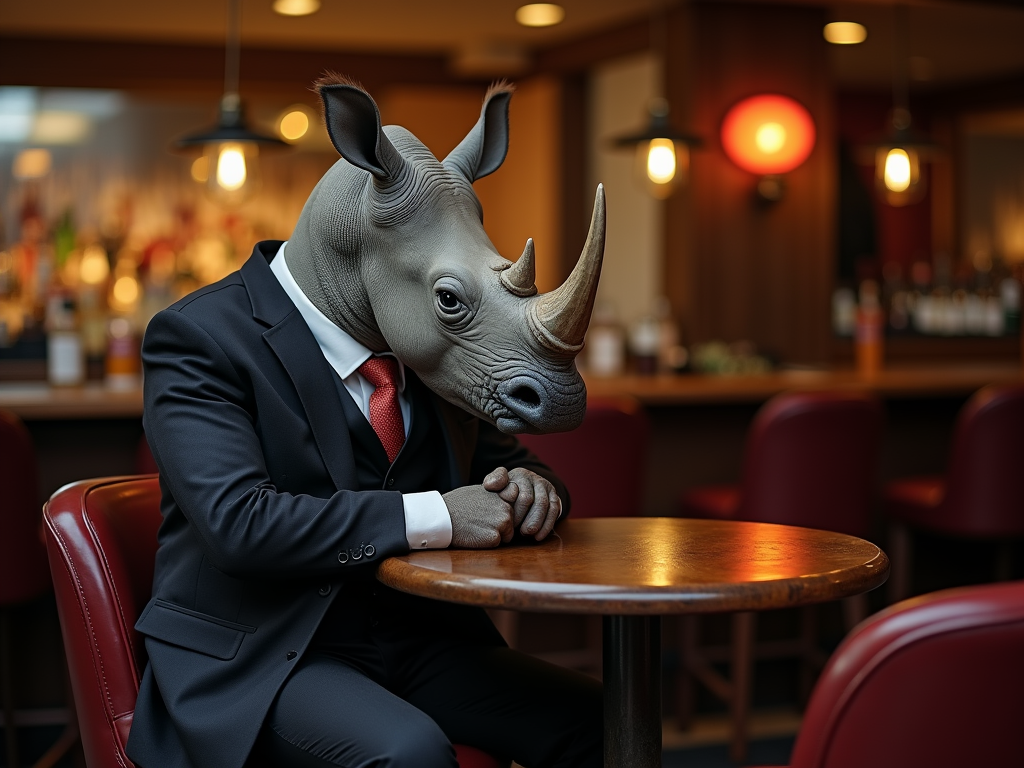


After transformation:


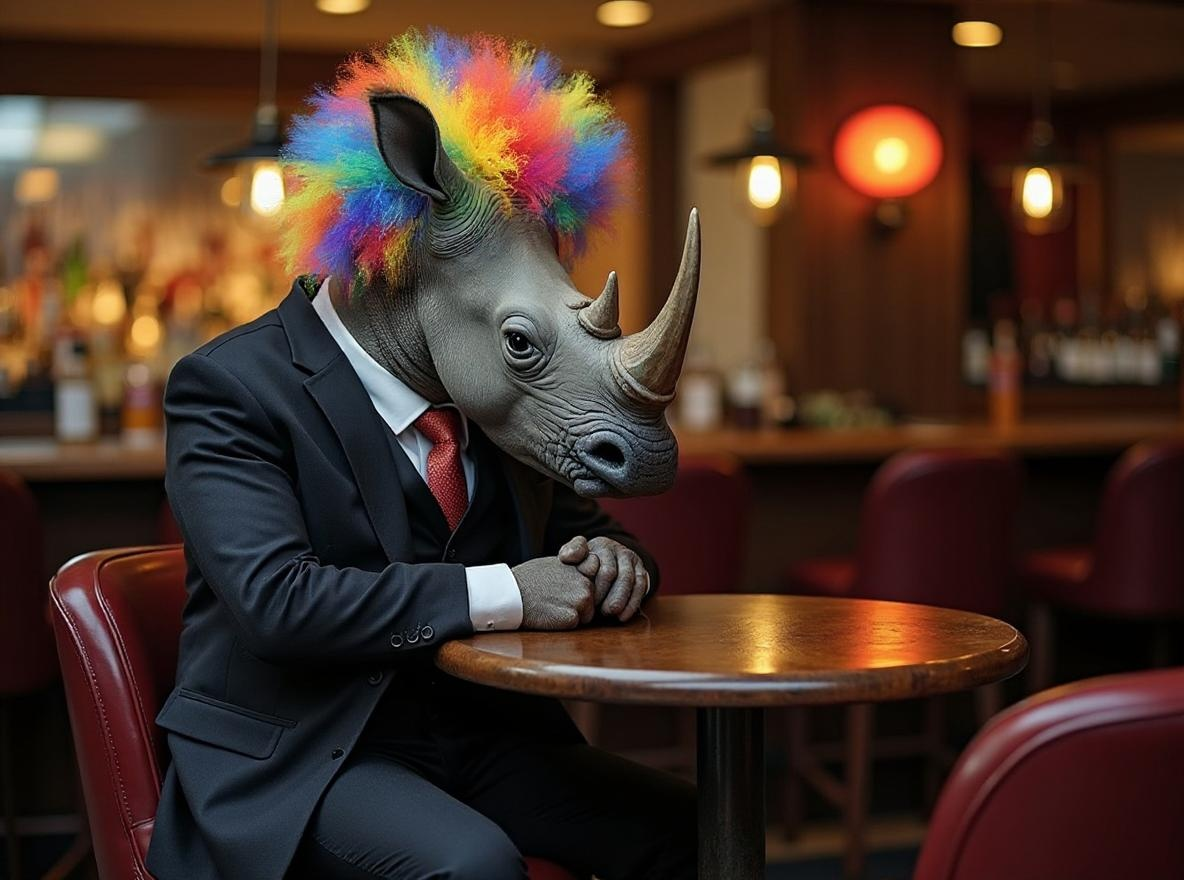

In [1]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

url = fal_client.upload_file("rhino-suit.png")

prompt = "put a clown wig on the rhino."

result = fal_client.subscribe(
    "fal-ai/flux-pro/kontext",
    arguments={
        "image_url": url,
        "prompt": prompt
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

# Load original image
print("\Before transformation:")
original_img = Image.open("rhino-suit.png")
display(original_img)
print("\nAfter transformation:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)